In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

%matplotlib inline

In [7]:
df = pd.read_csv("/content/drive/MyDrive/data/Train.csv")

In [8]:
df

,id,date,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,...,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13,price
0,0,2011-1,560,NaN,2,59,3,0,30.0,1.0,...,0,0,0,0,0,0,0,0,0,4510000
1,1,2011-1,667,NaN,10,50,2,1,25.0,NaN,...,0,0,0,0,0,0,0,0,0,13231000
2,2,2011-1,90,0.0,1,48,2,0,25.0,0.0,...,0,0,0,0,0,0,0,0,0,2008000
3,3,2011-1,94,1.0,3,62,3,1,30.0,NaN,...,0,0,0,0,0,0,0,0,0,12680000
4,4,2011-1,232,0.0,3,60,3,0,25.0,NaN,...,0,0,0,0,0,0,0,0,0,3335000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,2012-3,401,0.0,5,30,1,0,30.0,NaN,...,0,0,0,0,0,0,0,0,0,1697000
99996,99996,2012-3,59,0.0,4,34,1,0,30.0,NaN,...,0,0,0,0,0,0,0,0,0,3620000
99997,99997,2012-3,253,NaN,3,52,2,0,5.0,NaN,...,0,0,0,0,0,0,0,0,0,6712000
99998,99998,2012-3,305,1.0,3,181,5,1,5.0,NaN,...,0,0,0,0,0,0,0,0,0,20835000


In [9]:
df.build_tech = df.build_tech.replace(np.NaN, 0.0)
df.g_lift = df.g_lift.replace(np.NaN, 0.0)
df.metro_dist = df.metro_dist.replace(np.NaN, df.metro_dist.mean())
del df["id"]
del df["date"]

In [10]:
df

,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,n_photos,kw1,...,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13,price
0,560,0.0,2,59,3,0,30.0,1.0,5,0,...,0,0,0,0,0,0,0,0,0,4510000
1,667,0.0,10,50,2,1,25.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,13231000
2,90,0.0,1,48,2,0,25.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,2008000
3,94,1.0,3,62,3,1,30.0,0.0,3,0,...,0,0,0,0,0,0,0,0,0,12680000
4,232,0.0,3,60,3,0,25.0,0.0,3,0,...,0,0,0,0,0,0,0,0,0,3335000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,401,0.0,5,30,1,0,30.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,1697000
99996,59,0.0,4,34,1,0,30.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,3620000
99997,253,0.0,3,52,2,0,5.0,0.0,4,0,...,0,0,0,0,0,0,0,0,0,6712000
99998,305,1.0,3,181,5,1,5.0,0.0,3,0,...,0,0,0,0,0,0,0,0,0,20835000


In [11]:
df.price.describe()

count    1.000000e+05
mean     5.138396e+06
std      4.187469e+06
min      4.480000e+05
25%      2.644000e+06
50%      4.090000e+06
75%      6.281000e+06
max      8.054800e+07
Name: price, dtype: float64

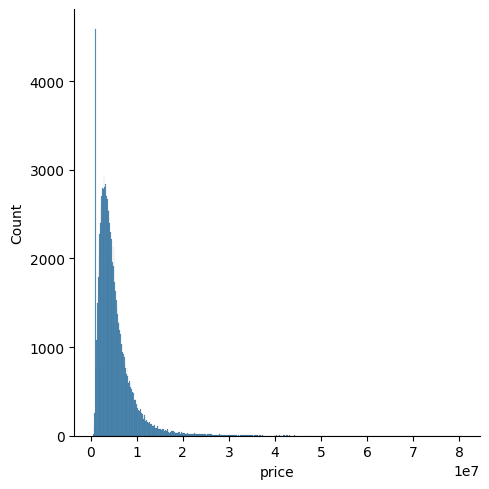

In [12]:
sns.displot(df.price)

<Axes: >

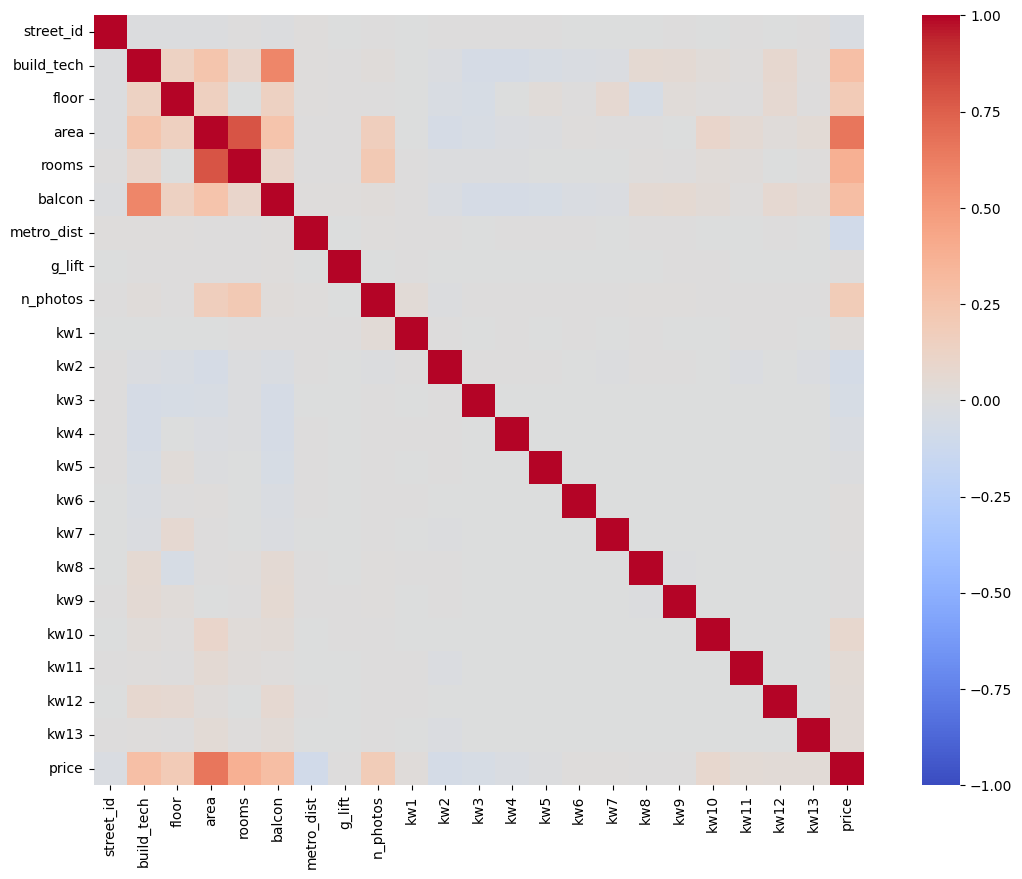

In [13]:
import pylab

pylab.rcParams['figure.figsize'] = (15, 10)
corrmatrix = df.corr()
sns.heatmap(corrmatrix,square=True,vmax=1,vmin=-1,center=0.0,cmap='coolwarm')

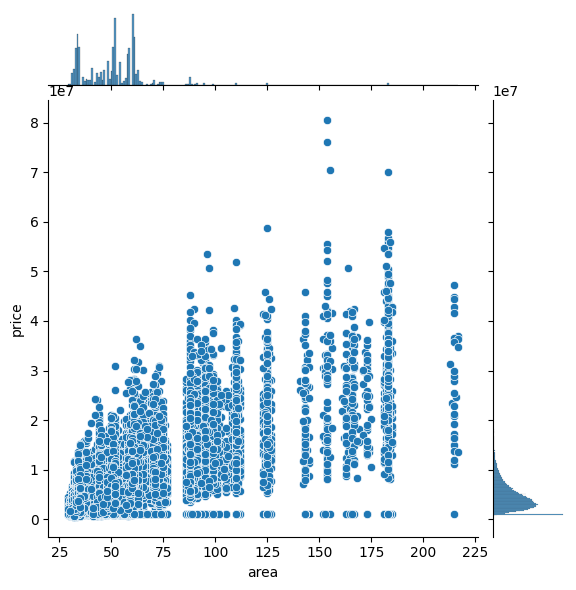

In [14]:
sns.jointplot(x='area',y='price',data=df)

In [15]:
X = df
y = df.price
del X["price"]

In [16]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

# XGB

In [17]:
xgb = XGBRegressor(n_estimators=119, learning_rate=0.7, max_depth=None)
xgb.fit(X_train, y_train.ravel())
preds = xgb.predict(X_val)
mean_absolute_error(preds, y_val)

975405.7367266216

# XGB Stacking

In [18]:
regs = [XGBRegressor(n_estimators=119, learning_rate=0.7, max_depth=None)] * 10
res_train = X_train
res_val = X_val
for i in regs:
    i.fit(X_train, y_train.ravel())
    res_train = np.hstack((res_train, i.predict(X_train).reshape((res_train.shape[0], 1))))
    res_val = np.hstack((res_val, i.predict(X_val).reshape((res_val.shape[0], 1))))
xgb_stack = XGBRegressor(n_estimators=119, learning_rate=0.7, max_depth=None)
xgb_stack.fit(res_train, y_train.ravel())
preds = xgb_stack.predict(res_val)
mean_absolute_error(y_val, preds)

954938.5938224432

# Hyperopt

In [19]:
from hyperopt import hp, fmin, tpe

def hyperopt_objective(params):
    print(params)
    model = XGBRegressor(**params)
    model.fit(X_train, y_train.ravel())
    y_pred = model.predict(X_val)
    return mean_absolute_error(y_val, y_pred)

space = {
    'n_estimators': hp.randint('n_estimators', 100, 1000),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.1),
    'max_depth': hp.randint('max_depth', 3, 10),
    'random_state': 42,
}

best = fmin(hyperopt_objective,
    space=space,
    algo=tpe.suggest,
    max_evals=20,
    rstate=np.random.default_rng(42)
)

{'learning_rate': 0.0658107097908977, 'max_depth': 8, 'n_estimators': 125, 'random_state': 42}
{'learning_rate': 0.06474242459540229, 'max_depth': 5, 'n_estimators': 860, 'random_state': 42}
{'learning_rate': 0.016629492290547172, 'max_depth': 4, 'n_estimators': 206, 'random_state': 42}
{'learning_rate': 0.029099540529400177, 'max_depth': 5, 'n_estimators': 667, 'random_state': 42}
{'learning_rate': 0.018698018110930824, 'max_depth': 6, 'n_estimators': 376, 'random_state': 42}
{'learning_rate': 0.02449216977557358, 'max_depth': 8, 'n_estimators': 760, 'random_state': 42}
{'learning_rate': 0.09972884889100951, 'max_depth': 7, 'n_estimators': 773, 'random_state': 42}
{'learning_rate': 0.08470806691352324, 'max_depth': 3, 'n_estimators': 529, 'random_state': 42}
{'learning_rate': 0.07942427358362536, 'max_depth': 8, 'n_estimators': 127, 'random_state': 42}
{'learning_rate': 0.053250145184011714, 'max_depth': 5, 'n_estimators': 945, 'random_state': 42}
{'learning_rate': 0.01371343216338214

In [20]:
tuned_xgb = XGBRegressor(**best)
tuned_xgb.fit(X_train, y_train.ravel())
preds = tuned_xgb.predict(X_val)
mean_absolute_error(preds, y_val)

898081.7069375296

# Create baseline

In [21]:
df_test = pd.read_csv("/content/drive/MyDrive/data/Test.csv")
X_test = df_test.copy()
del X_test["id"]
del X_test["date"]
X_test.build_tech = X_test.build_tech.replace(np.NaN, 0.0)
X_test.g_lift = X_test.g_lift.replace(np.NaN, 0.0)
X_test.metro_dist = X_test.metro_dist.replace(np.NaN, X_test.metro_dist.mean())

In [22]:
X_test

,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,n_photos,kw1,...,kw4,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13
0,459,0.0,1,60,3,1,30.000000,0.0,4,0,...,0,0,0,0,0,0,0,0,0,0
1,344,1.0,10,52,2,1,22.081353,0.0,4,0,...,0,0,0,0,0,0,0,0,0,0
2,585,0.0,4,54,3,0,30.000000,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,494,0.0,2,52,2,1,25.000000,1.0,3,0,...,0,0,0,0,0,0,0,0,0,0
4,622,1.0,9,60,3,1,15.000000,0.0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,613,1.0,2,34,1,1,25.000000,0.0,2,0,...,0,0,0,0,0,0,0,0,0,0
99996,167,1.0,10,61,3,1,30.000000,0.0,4,0,...,0,0,0,0,0,0,0,0,0,0
99997,391,1.0,9,34,1,1,30.000000,0.0,3,0,...,0,0,0,0,0,0,0,0,0,0
99998,21,0.0,7,58,3,0,30.000000,0.0,3,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
preds = tuned_xgb.predict(X_test)

In [24]:
df_test["price"] = preds

df_test[["id", "price"]].to_csv("baseline.csv", index=False)

!cat baseline.csv | head

id,price
100000,7225388.0
100001,4914863.0
100002,3577819.0
100003,3348891.2
100004,6361469.0
100005,4267187.0
100006,1959227.4
100007,926702.1
100008,2871475.0


# Catboost